DJI Matrice 600 data processing notebook

In [3]:
import matplotlib as mpl
import matplotlib.cm
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
import pandas as pd
import pymap3d as pm
#from math import *
from datetime import datetime
from matplotlib.transforms import offset_copy
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import geopy.distance
from scalebar import scale_bar #requires the existance of scalebar.py

import drone

plt.rcParams["figure.figsize"] = (5,5)


In [4]:
# Staple a pair of files together
drone.process_files(['FLY147', 'FLY148'])

# Now read in the file we just created
df = pd.read_csv("./csv_out/FLY147_FLY148_processed.csv", sep=',', header=0)
df = df.assign(timestamp = pd.to_datetime(df['timestamp'].values))
df = df.where(df != 0.)
df.dropna(thresh=2, inplace=True)

print(df.columns)

# Write down the name of our file for future reference
NAME = 'FLY147_FLY148'

20
-0.213
2019-07-11T19:39:50
INIT TIME SET AT 1561691247
37
-0.63
2019-07-11T20:08:58
INIT TIME SET AT 838546948
STAPLING...
STAPLING SUCCEEDED
GAP # 0
2019-07-11T20:08:57Z
2019-07-11T20:08:57Z
ERROR: PLEASE CLEAR STAPLER JAM
FLY147_FLY148_
Saved NPZ
Saved CSV
Index(['Unnamed: 0', 'Lat', 'Lon', 'hmsl', 'sec_elapsed', 'datetimestamp',
       'tick', 'timestamp'],
      dtype='object')


In [5]:
# Fill in some extra columns
df = drone.fill_moving(df)
print(df.columns)

df = drone.fill_avMov(df)
print(df.columns)

Index(['Unnamed: 0', 'Lat', 'Lon', 'hmsl', 'sec_elapsed', 'datetimestamp',
       'tick', 'timestamp', 'std_lat', 'std_lon', 'std_hmsl', 'isMoving'],
      dtype='object')
Index(['Unnamed: 0', 'Lat', 'Lon', 'hmsl', 'sec_elapsed', 'datetimestamp',
       'tick', 'timestamp', 'std_lat', 'std_lon', 'std_hmsl', 'isMoving',
       'avMovLat', 'avMovLon', 'avMovHmsl'],
      dtype='object')


/home/annie/Documents/newburgh-group-2/drone_data/drone.py:233: RuntimeWarning: invalid value encountered in greater
  df = df.assign(isMoving = np.logical_or(np.greater(df["std_lat"].values,xy_thresh),
/home/annie/Documents/newburgh-group-2/drone_data/drone.py:234: RuntimeWarning: invalid value encountered in greater
  np.greater(df["std_lon"].values, xy_thresh),
/home/annie/Documents/newburgh-group-2/drone_data/drone.py:235: RuntimeWarning: invalid value encountered in greater
  np.greater(df["std_hmsl"].values, h_thresh)))


<IPython.core.display.Javascript object>


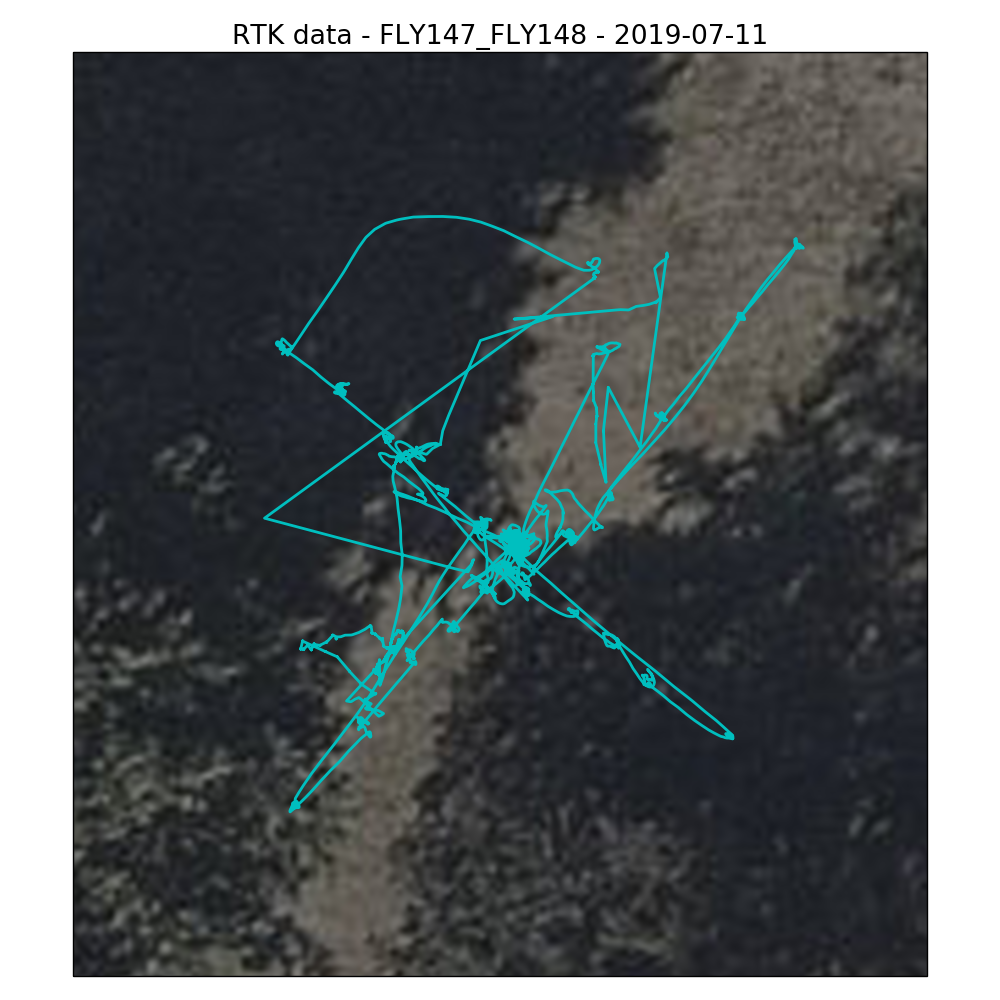

In [6]:
# Plot the flight path
%matplotlib notebook 
drone.plot_satellite(df, NAME)

In [5]:
# pick the center and generate local coordinates
df = drone.make_ENU(df, lat_origin=41.320496, lon_origin=-72.922405, height_origin=42.5)
df = drone.make_az_el(df, lat_origin=41.320496, lon_origin=-72.922405, height_origin=42.5)

41.320496
-72.922405
41.320496
-72.922405


/home/annie/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


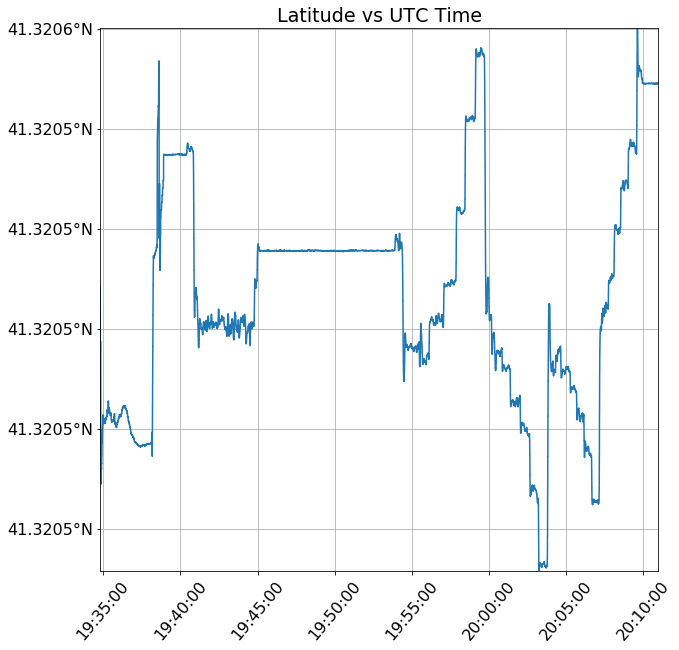

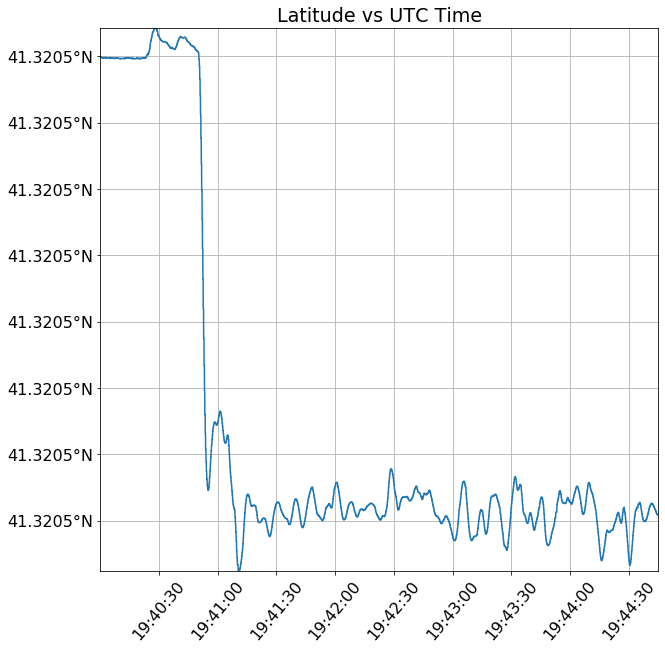

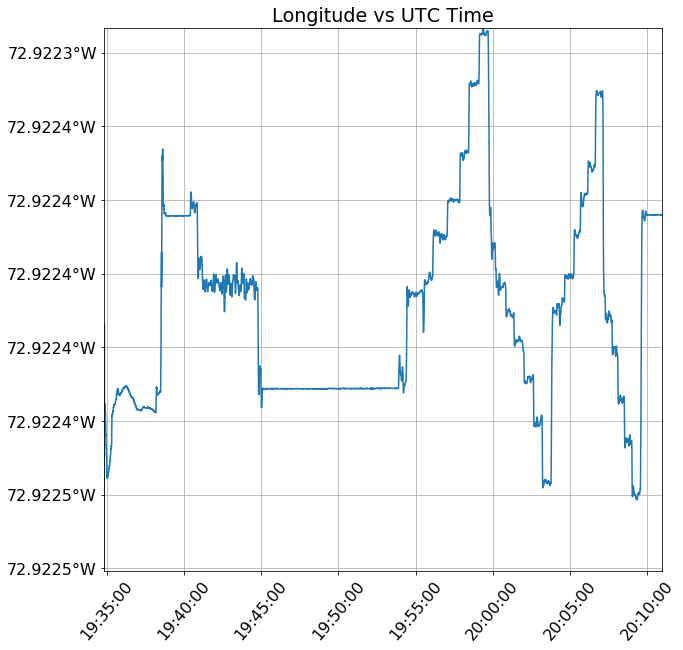

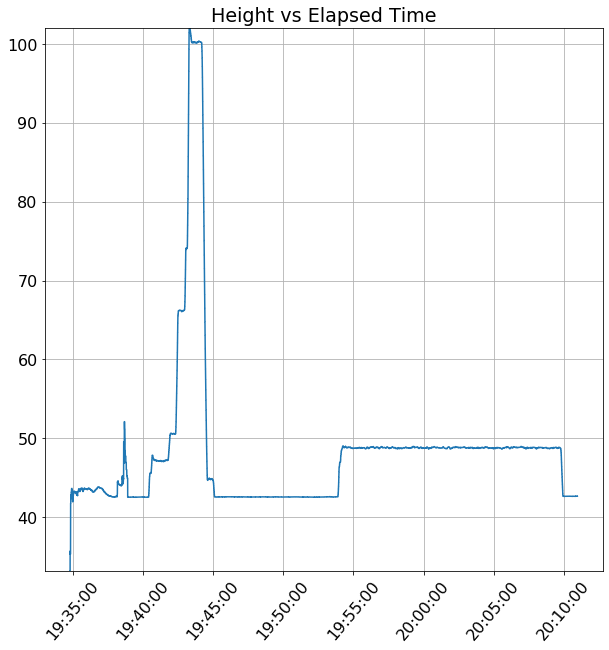

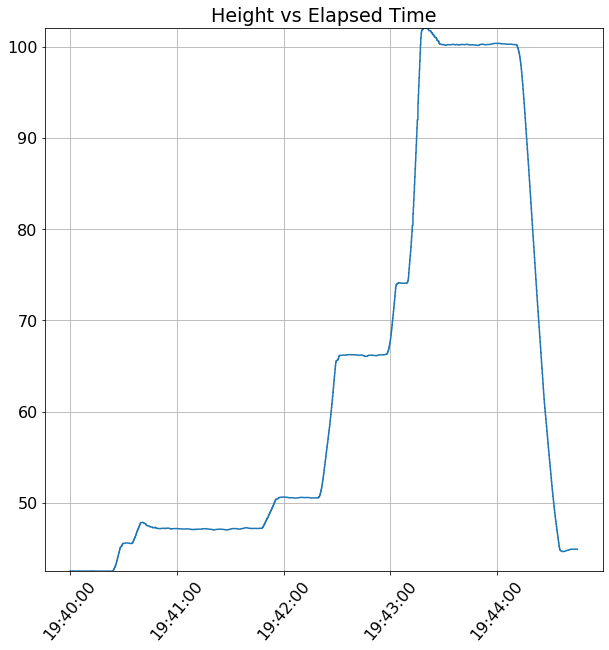

In [6]:
# Plot latitude, longitude, and height
%matplotlib inline
drone.plot_latitude(df, NAME)
cut_frame = drone.chop_time(df, np.datetime64("2019-07-11T19:40:00"), np.datetime64("2019-07-11T19:44:45"))
drone.plot_latitude(cut_frame, NAME)
drone.plot_longitude(df, NAME)
drone.plot_height(df, NAME)
drone.plot_height(cut_frame, NAME)

<IPython.core.display.Javascript object>


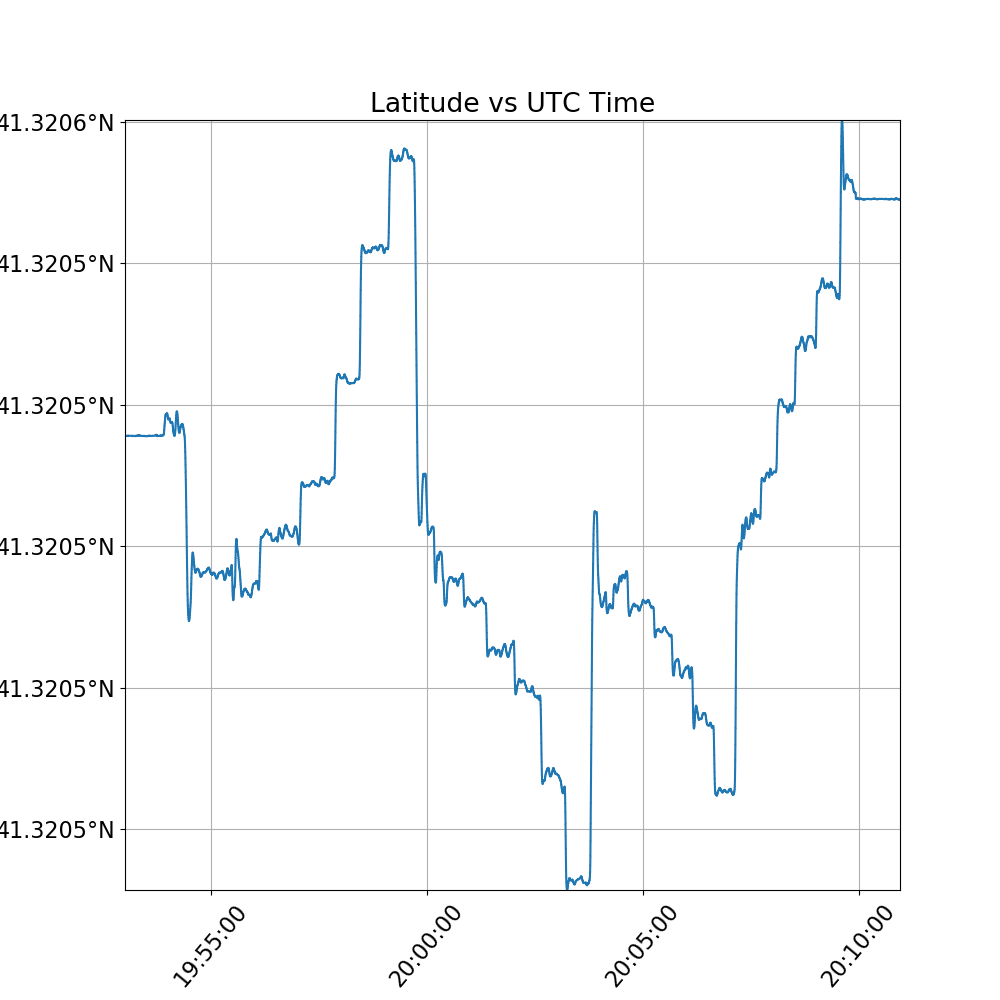

<IPython.core.display.Javascript object>


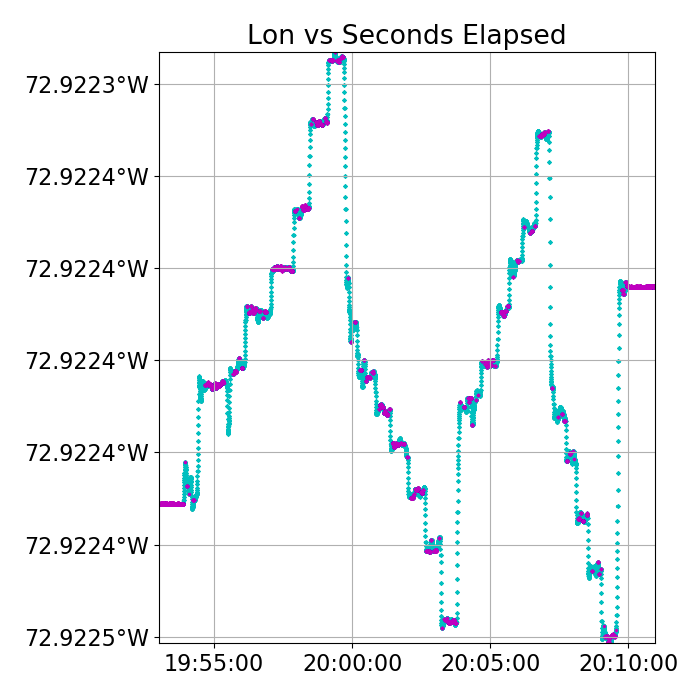

In [7]:
# Make a dataframe containing only our beammapping data
df_cut = drone.chop_time(df, np.datetime64("2019-07-11T19:53:00"), np.datetime64("2019-07-11T20:11:00"))

# Make the plot we'll use to tag points
%matplotlib notebook 
# this adds a time readout to the bottom right corner
drone.plot_latitude(df_cut, NAME)
drone.plot_moving(df_cut, NAME, figsize=(7,7))


In [8]:
# now, tag the points! (this is the annoying part)
if("point" in df.columns): df = df.drop(columns=['point'])
df = drone.mark_point(df, np.datetime64("2019-07-11T19:54:59"))
df = drone.mark_point(df, np.datetime64("2019-07-11T19:55:53"))
df = drone.mark_point(df, np.datetime64("2019-07-11T19:56:33"))
df = drone.mark_point(df, np.datetime64("2019-07-11T19:57:30"))
df = drone.mark_point(df, np.datetime64("2019-07-11T19:58:11"))
df = drone.mark_point(df, np.datetime64("2019-07-11T19:58:46"))
df = drone.mark_point(df, np.datetime64("2019-07-11T19:59:30"))
df = drone.mark_point(df, np.datetime64("2019-07-11T20:00:06"))
df = drone.mark_point(df, np.datetime64("2019-07-11T20:00:36"))
df = drone.mark_point(df, np.datetime64("2019-07-11T20:01:08"))
df = drone.mark_point(df, np.datetime64("2019-07-11T20:01:42"))
df = drone.mark_point(df, np.datetime64("2019-07-11T20:02:22"))
df = drone.mark_point(df, np.datetime64("2019-07-11T20:02:58"))
df = drone.mark_point(df, np.datetime64("2019-07-11T20:03:27"))
df = drone.mark_point(df, np.datetime64("2019-07-11T20:04:16"))
df = drone.mark_point(df, np.datetime64("2019-07-11T20:04:59"))
df = drone.mark_point(df, np.datetime64("2019-07-11T20:05:33"))
df = drone.mark_point(df, np.datetime64("2019-07-11T20:05:58"))
df = drone.mark_point(df, np.datetime64("2019-07-11T20:06:30"))
df = drone.mark_point(df, np.datetime64("2019-07-11T20:07:01"))
df = drone.mark_point(df, np.datetime64("2019-07-11T20:07:29"))
df = drone.mark_point(df, np.datetime64("2019-07-11T20:07:59"))
df = drone.mark_point(df, np.datetime64("2019-07-11T20:08:22"))
df = drone.mark_point(df, np.datetime64("2019-07-11T20:08:48"))
df = drone.mark_point(df, np.datetime64("2019-07-11T20:09:21"))
print(df['point'].values)

2019-07-11T19:54:35.385000000
2019-07-11T19:55:28.774000000
-1
2019-07-11T19:55:42.581000000
2019-07-11T19:56:02.200000000
0
2019-07-11T19:56:08.382000000
2019-07-11T19:57:03.197000000
1
2019-07-11T19:57:04.586000000
2019-07-11T19:57:51.596000000
2
2019-07-11T19:57:53.391000000
2019-07-11T19:58:26.195000000
3
2019-07-11T19:58:28.385000000
2019-07-11T19:59:06.400000000
4
2019-07-11T19:59:22.588000000
2019-07-11T19:59:42.195000000
5
2019-07-11T20:00:00.368000000
2019-07-11T20:00:09.802000000
6
2019-07-11T20:00:27.789000000
2019-07-11T20:00:50.594000000
7
2019-07-11T20:00:51.182000000
2019-07-11T20:01:22.400000000
8
2019-07-11T20:01:23.191000000
2019-07-11T20:01:57.000000000
9
2019-07-11T20:02:09.182000000
2019-07-11T20:02:37.794000000
10
2019-07-11T20:02:39.383000000
2019-07-11T20:03:06.394000000
11
2019-07-11T20:03:13.365000000
2019-07-11T20:03:46.780000000
12
2019-07-11T20:04:08.586000000
2019-07-11T20:04:19.199000000
13
2019-07-11T20:04:39.582000000
2019-07-11T20:05:15.394000000
14
20

<IPython.core.display.Javascript object>


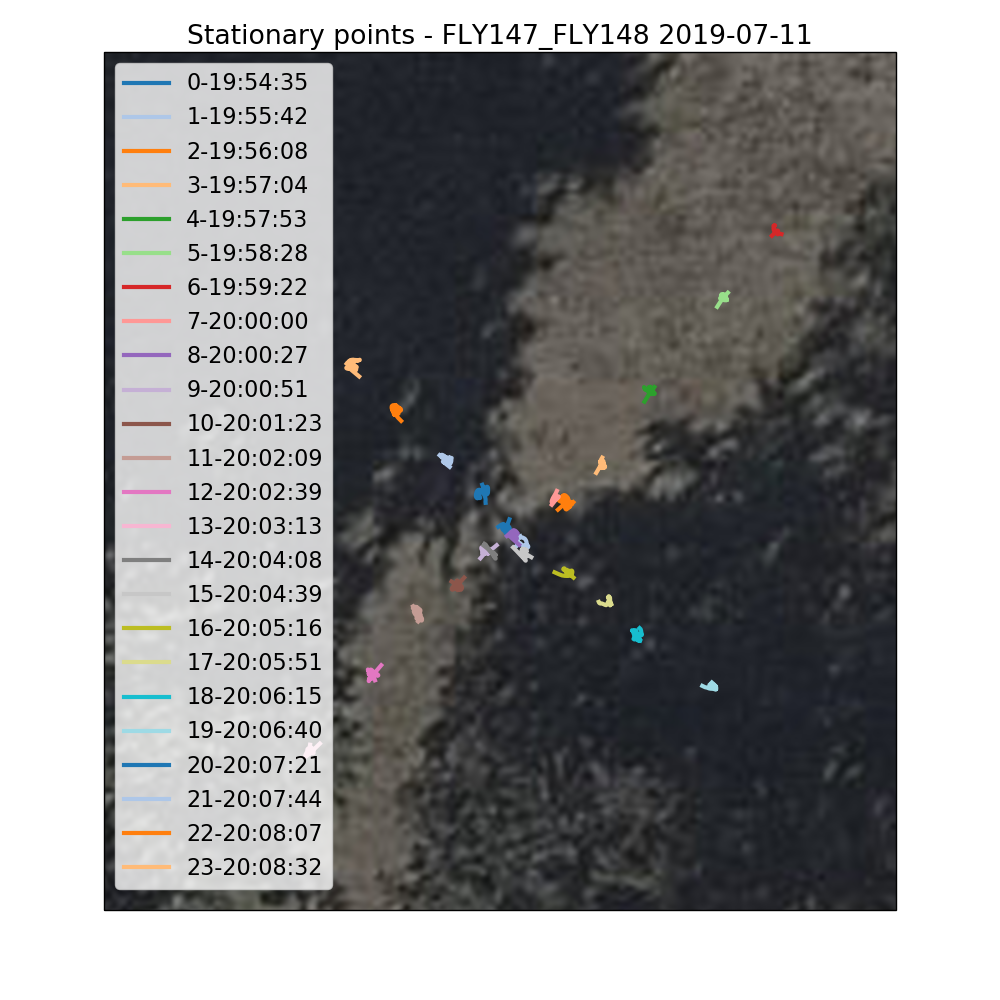

saved plot


In [9]:
# Plot the points
drone.plot_points(df, NAME, legend=True)

In [10]:
# save the points as an NPZ (to give to Will)
drone.output_points(df, NAME)

Saved NPZ


In [11]:
# report the statistics of a couple of points
drone.point_stats(df, 2)

hello stationary stats
Latitude spread: 0.3205671530934047
Longitude spread: 0.3385496243007762
Diagonal distance: 0.4662393674461725
Double check: 0.46623936224661533
Latitude standard deviation: 0.07178752604776857 meters
Longitude standard deviation: 0.06538316966767423 meters
Height standard deviation: 0.06378671399796189 meters
Diagonal lat-lon stddev: 0.09709998830889854 meters


(0.07178752604776857,
 0.06538316966767423,
 0.06378671399796189,
 0.09709998830889854)